In [1]:
# MODULE IMPORTS ----

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm

In [7]:
out = hddm.simulators.simulator_h_c(model = 'ddm',
                              theta = [0., 1., 0.5, 0.5],
                              n_trials_per_subject = 100,
                              n_subjects = 5,
                              regression_covariates = None,
                              depends_on = {})

In [8]:
dataset = out[0]
dataset['cov1'] = np.random.choice(2, size = 500) # - 0.5
dataset['cov2'] = np.random.choice(2, size = 500) # - 0.5
dataset['cov3'] = np.random.choice(2, size = 500) # - 0.5

In [10]:
# v_reg = {'model' : "v ~ 1 + C(Valence) + C(MFCTType)", 'link_func' : lambda x: x}
# t_reg = {'model' : "t ~ 1 + C(Action)", 'link_func' : lambda x: x}
# a_reg = {'model' : 'a ~ 1 + C(Valence) * C(Action)', 'link_func' : lambda x: x}
# reg_descr = [t_reg, a_reg, v_reg]
# # m = hddm.HDDMRegressor(data1, reg_descr, p_outlier = .05)


In [12]:
# m_nn = hddm.HDDMnnRegressor(dataset, reg_descr, p_outlier = .05, include = ['z'])

In [4]:
v_reg = {'model' : "v ~ 1 + C(cov1) + C(cov2)", 'link_func' : lambda x: x}
t_reg = {'model' : "t ~ 1 + C(cov3)", 'link_func' : lambda x: x}
a_reg = {'model' : 'a ~ 1 + C(cov1) * C(cov3)', 'link_func' : lambda x: x}
reg_descr = [t_reg, a_reg, v_reg]
m = hddm.HDDMRegressor(dataset, reg_descr, p_outlier = .05, include = ['z'])

No model attribute --> setting up standard HDDM
Set model to ddm


In [13]:
v_reg = {'model' : "v ~ 1 + C(cov1) + C(cov2)", 'link_func' : lambda x: x}
t_reg = {'model' : "t ~ 1 + C(cov3)", 'link_func' : lambda x: x}
a_reg = {'model' : 'a ~ 1 + C(cov1) * C(cov3)', 'link_func' : lambda x: x}
reg_descr = [t_reg, a_reg, v_reg]

m_nn = hddm.HDDMnnRegressor(dataset, reg_descr, p_outlier = .05, include = ['z'])

Using default priors: Uninformative
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [14]:
m_nn.sample(500, burn = 200, db = 'pickle', dbname = 'traces_nn.db')
m_nn.save('test_nn.pickle')

 [-----------------100%-----------------] 501 of 500 complete in 614.6 sec

In [87]:
v_reg = {'model' : "v ~ 1 + C(cov1) + C(cov2)", 'link_func' : lambda x: x}
a_reg = {'model' : 'a ~ 1 + C(cov1) * C(cov3)', 'link_func' : lambda x: x}
reg_descr = [a_reg, v_reg]
m3 = hddm.HDDMRegressor(dataset, reg_descr, p_outlier = .05, include = ['z'], depends_on = {'t': ['cov3']})

No model attribute --> setting up standard HDDM
Set model to ddm


In [16]:
v_reg = {'model' : "v ~ 1 + C(cov1) + C(cov2)", 'link_func' : lambda x: x}
a_reg = {'model' : 'a ~ 1 + C(cov1) * C(cov3)', 'link_func' : lambda x: x}
reg_descr = [a_reg, v_reg]
m3_nn = hddm.HDDMnnRegressor(dataset, reg_descr, p_outlier = .05, include = ['z'], depends_on = {'t': ['cov3']})

Using default priors: Uninformative
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [17]:
m3_nn.sample(500, burn = 200, db = 'pickle', dbname = 'traces3_nn.db')
m3_nn.save('test3_nn.pickle')

 [-----------------100%-----------------] 501 of 500 complete in 934.7 sec

In [101]:
v_reg = {'model' : "v ~ 1 + C(cov1) + C(cov2)", 'link_func' : lambda x: x}
a_reg = {'model' : 'a ~ 1 + C(cov1)', 'link_func' : lambda x: x}
reg_descr = [a_reg, v_reg]
m4 = hddm.HDDMRegressor(dataset, reg_descr, p_outlier = .05, include = ['z'], depends_on = {'t': ['cov3']})

No model attribute --> setting up standard HDDM
Set model to ddm


In [102]:
m4.sample(500, burn = 200, db = 'pickle', dbname = 'traces4.db')

 [-----------------100%-----------------] 501 of 500 complete in 541.6 sec

In [104]:
m4.save('test4.pickle')

In [10]:
m2 = hddm.HDDM(dataset, p_outlier = .05, include = ['z'], depends_on = {'v': ['cov1']})

No model attribute --> setting up standard HDDM
Set model to ddm


In [11]:
m2.sample(500, burn = 200, db = 'pickle', dbname = 'traces2.db')

 [-----------------100%-----------------] 500 of 500 complete in 55.5 sec

In [5]:
m.sample(500, burn = 200, db = 'pickle', dbname = 'traces.db')

 [-----------------100%-----------------] 501 of 500 complete in 488.9 sec

In [88]:
m3.sample(500, burn = 200, db = 'pickle', dbname = 'traces3.db')

 [-----------------100%-----------------] 501 of 500 complete in 563.1 sec

tracename: 
v_Intercept
tracename: 
v_Intercept_subj.0
tracename: 
v_Intercept_subj.1
tracename: 
v_Intercept_subj.2
tracename: 
v_Intercept_subj.3
tracename: 
v_Intercept_subj.4
tracename: 
v_C(cov1)[T.1]
tracename: 
v_C(cov2)[T.1]
tracename: 
a_Intercept
tracename: 
a_Intercept_subj.0
tracename: 
a_Intercept_subj.1
tracename: 
a_Intercept_subj.2
tracename: 
a_Intercept_subj.3
tracename: 
a_Intercept_subj.4
tracename: 
a_C(cov1)[T.1]
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
t(0)
tracename: 
t(1)
tracename: 
t_subj(0).0
tracename: 
t_subj(0).1
tracename: 
t_subj(0).2
tracename: 
t_subj(0).3
tracename: 
t_subj(0).4
tracename: 
t_subj(1).0
tracename: 
t_subj(1).1
tracename: 
t_subj(1).2
tracename: 
t_subj(1).3
tracename: 
t_subj(1).4


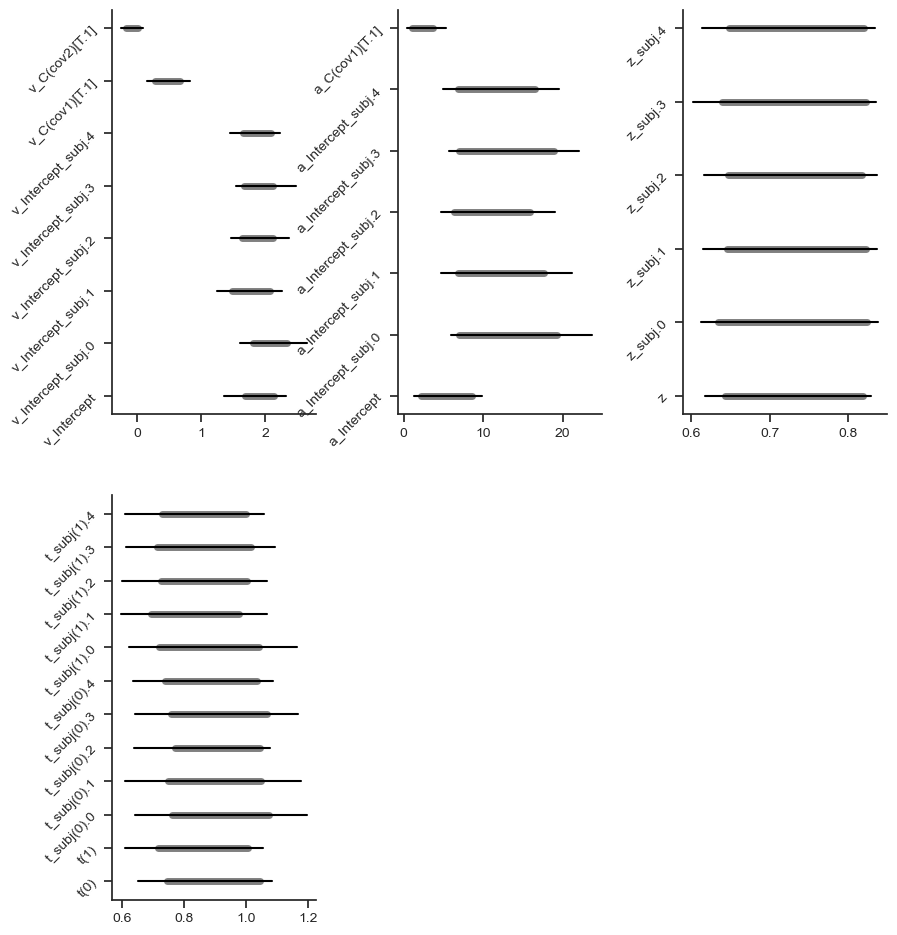

In [105]:
hddm.plotting.plot_caterpillar(m4)

In [2]:
m4 = hddm.load('test4.pickle')

In [3]:
hddm.plotting.plot_posterior_pair(m4)

'Note: The posterior pair plot does not support regression models at this point! Aborting...'

In [3]:
hddm.utils.post_pred_gen(m4)

 [------------------110%-------------------] 11 of 10 complete in 37.0 sec

rt  response
node      sample                       
wfpt(0).0 0      0   1.878300         1
                 1   2.916337         1
                 2   2.529319         1
                 3   1.720302         1
                 4   2.335310         1
...                       ...       ...
wfpt(1).4 499    42  3.139461         1
                 43  1.742431         1
                 44  1.858429         1
                 45  1.710431         1
                 46  3.790413         1

[250000 rows x 2 columns]

In [4]:
m3 = hddm.load('test3.pickle')
hddm.utils.post_pred_gen(m3)

 [------------------110%-------------------] 11 of 10 complete in 36.2 sec

rt  response
node      sample                       
wfpt(0).0 0      0   2.143439         1
                 1   2.639462         1
                 2   1.786440         1
                 3   1.711441         1
                 4   3.682439         1
...                       ...       ...
wfpt(1).4 499    42  2.367393         1
                 43  1.886371         1
                 44  2.331392         1
                 45  1.423359         1
                 46  3.328350         1

[250000 rows x 2 columns]

In [15]:
hddm.utils.post_pred_gen(m_nn)

 [--------------------120%---------------------] 6 of 5 complete in 15.4 sec

rt  response
node   sample                       
wfpt.0 0      0   1.820265         1
              1   2.252271         1
              2   1.461835         1
              3   2.105826         1
              4   1.649832         1
...                    ...       ...
wfpt.4 499    95  1.207451         1
              96  2.233460         1
              97  1.154452         1
              98  1.771351         1
              99  2.176458         1

[250000 rows x 2 columns]

In [2]:
m3_nn = hddm.load('test3_nn.pickle')
hddm.utils.post_pred_gen(m3_nn)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10
 [------------------110%-------------------] 11 of 10 complete in 24.5 sec

rt  response
node      sample                       
wfpt(0).0 0      0   1.452724         1
                 1   1.599722         1
                 2   1.946718         1
                 3   2.802748         1
                 4   1.918718         1
...                       ...       ...
wfpt(1).4 499    49  1.214400        -1
                 50  1.690394         1
                 51  1.282399         1
                 52  1.187400         1
                 53  1.341398         1

[250000 rows x 2 columns]

In [5]:
dir(m3_nn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_indirect_betas',
 '_add_indirect_regressors',
 '_approximate_map_subj',
 '_create_an_average_model',
 '_create_family_exp',
 '_create_family_gamma_gamma_hnormal',
 '_create_family_invlogit',
 '_create_family_normal',
 '_create_family_normal_non_centered',
 '_create_family_normal_normal_hnormal',
 '_create_family_trunc_normal',
 '_create_family_trunc_normal_trunc_normal',
 '_create_family_trunc_normal_trunc_normal_hnormal',
 '_create_stochastic_knodes',
 '_create_stochastic_knodes_info',
 '_create_stochastic_knodes_nn_info',
 '_create_stochastic_knodes_nn_noninfo',
 '

In [7]:
hasattr(m3_nn, 'reg_outcomes')

True

In [ ]:
ppc_data = hddm.utils.post_pred_gen(m)

In [96]:
help(hddm.utils.post_pred_gen)

Help on function post_pred_gen in module kabuki.analyze:

post_pred_gen(model, groupby=None, samples=500, append_data=False, add_model_parameters=False, progress_bar=True)
    Run posterior predictive check on a model.
    
    :Arguments:
        model : kabuki.Hierarchical
            Kabuki model over which to compute the ppc on.
    
    :Optional:
        samples : int
            How many samples to generate for each node.
        groupby : list
            Alternative grouping of the data. If not supplied, uses splitting
            of the model (as provided by depends_on).
        append_data : bool (default=False)
            Whether to append the observed data of each node to the replicatons.
        progress_bar : bool (default=True)
            Display progress bar
    
    :Returns:
        Hierarchical pandas.DataFrame with multiple sampled RT data sets.
        1st level: wfpt node
        2nd level: posterior predictive sample
        3rd level: original data index
    

In [107]:
ppc_data = hddm.utils.post_pred_gen(m4)

ValueError: could not broadcast input array from shape (100) into shape (42)

In [6]:
m.save('test.pickle')

In [ ]:
m2.save('test2.pickle')

In [90]:
m3.save('test3.pickle')

In [2]:
m = hddm.load('test.pickle')

In [3]:
m.nodes_db.index

Index(['z_trans', 'z', 'z_std', 'z_tau', 'z_subj_trans.0', 'z_subj_trans.1',
       'z_subj_trans.2', 'z_subj_trans.3', 'z_subj_trans.4', 'z_subj.0',
       'z_subj.1', 'z_subj.2', 'z_subj.3', 'z_subj.4', 't_Intercept',
       't_Intercept_std', 't_Intercept_rate', 't_Intercept_shape',
       't_Intercept_subj.0', 't_Intercept_subj.1', 't_Intercept_subj.2',
       't_Intercept_subj.3', 't_Intercept_subj.4', 't_C(cov3)[T.1]', 't_reg.0',
       't_reg.1', 't_reg.2', 't_reg.3', 't_reg.4', 'a_Intercept',
       'a_Intercept_std', 'a_Intercept_rate', 'a_Intercept_shape',
       'a_Intercept_subj.0', 'a_Intercept_subj.1', 'a_Intercept_subj.2',
       'a_Intercept_subj.3', 'a_Intercept_subj.4', 'a_C(cov1)[T.1]',
       'a_C(cov3)[T.1]', 'a_C(cov1)[T.1]:C(cov3)[T.1]', 'a_reg.0', 'a_reg.1',
       'a_reg.2', 'a_reg.3', 'a_reg.4', 'v_Intercept', 'v_Intercept_std',
       'v_Intercept_tau', 'v_Intercept_subj.0', 'v_Intercept_subj.1',
       'v_Intercept_subj.2', 'v_Intercept_subj.3', 'v_Intercept

In [69]:
m.nodes_db

,knode_name,stochastic,observed,subj,node,tag,depends,hidden,rt,response,...,cov2,cov3,mean,std,2.5q,25q,50q,75q,97.5q,mc err
z_trans,z_trans,True,False,False,z_trans,(),[],True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z,z,False,False,False,z,(),[],False,NaN,NaN,...,NaN,NaN,0.61513,0.022981,0.576556,0.600548,0.608673,0.636484,0.664656,0.002281
z_std,z_std,True,False,False,z_std,(),[],False,NaN,NaN,...,NaN,NaN,0.025565,0.018621,0.001553,0.010142,0.023317,0.036824,0.075958,0.001724
z_tau,z_tau,False,False,False,z_tau,(),[],True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z_subj_trans.0,z_subj_trans,True,False,True,z_subj_trans.0,(),[subj_idx],True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wfpt.0,wfpt,False,True,False,wfpt.0,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wfpt.1,wfpt,False,True,False,wfpt.1,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wfpt.2,wfpt,False,True,False,wfpt.2,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wfpt.3,wfpt,False,True,False,wfpt.3,(),[subj_idx],False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# m.nodes_db['node'].loc['v_Intercept'].trace()

In [63]:
x = pickle.load(open('traces.db', 'rb'))

In [98]:
# x

In [26]:
help(m2.mc.trace)

Help on method trace in module pymc.Model:

trace(name, chain=-1) method of pymc.MCMC.MCMC instance
    Return the trace of a tallyable object stored in the database.
    
    :Parameters:
    name : string
      The name of the tallyable object.
    chain : int
      The trace index. Setting `chain=i` will return the trace created by
      the ith call to `sample`.



tracename: 
v_Intercept
tracename: 
v_Intercept_subj.0
tracename: 
v_Intercept_subj.1
tracename: 
v_Intercept_subj.2
tracename: 
v_Intercept_subj.3
tracename: 
v_Intercept_subj.4
tracename: 
v_C(cov1)[T.1]
tracename: 
v_C(cov2)[T.1]
tracename: 
a_Intercept
tracename: 
a_Intercept_subj.0
tracename: 
a_Intercept_subj.1
tracename: 
a_Intercept_subj.2
tracename: 
a_Intercept_subj.3
tracename: 
a_Intercept_subj.4
tracename: 
a_C(cov1)[T.1]
tracename: 
a_C(cov3)[T.1]
tracename: 
a_C(cov1)[T.1]:C(cov3)[T.1]
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
t(0)
tracename: 
t(1)
tracename: 
t_subj(0).0
tracename: 
t_subj(0).1
tracename: 
t_subj(0).2
tracename: 
t_subj(0).3
tracename: 
t_subj(0).4
tracename: 
t_subj(1).0
tracename: 
t_subj(1).1
tracename: 
t_subj(1).2
tracename: 
t_subj(1).3
tracename: 
t_subj(1).4


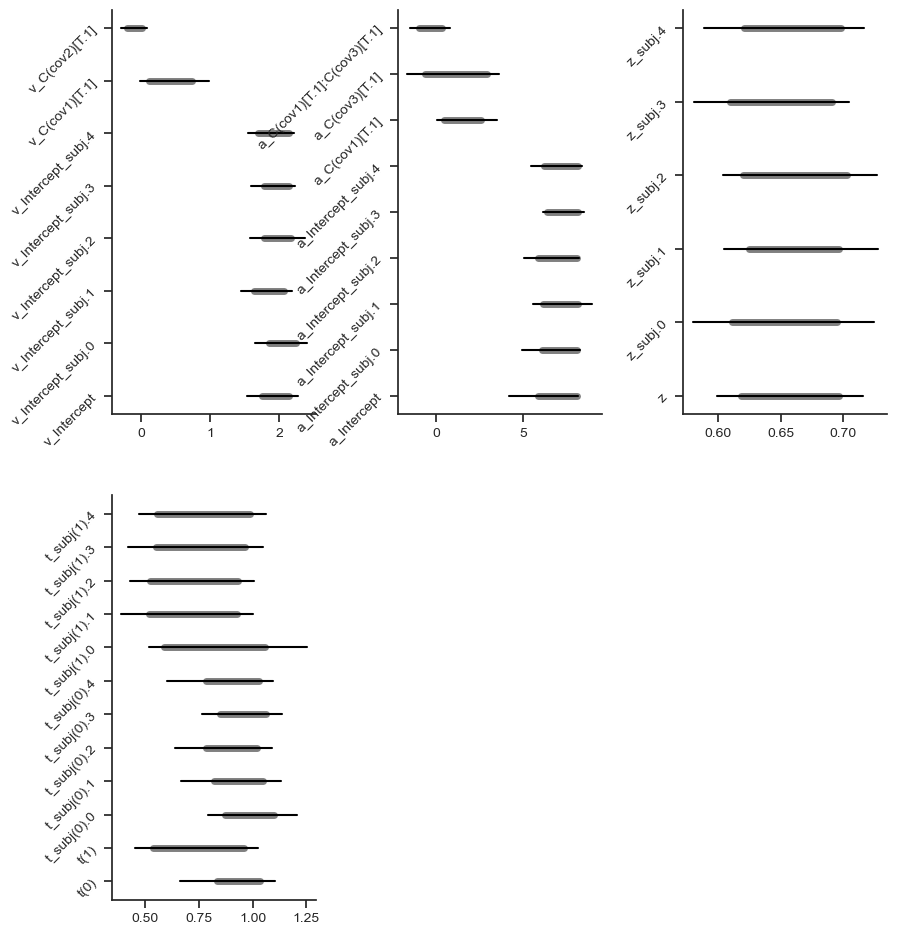

In [99]:
hddm.plotting.plot_caterpillar(m3)